## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company wants to know:
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

## Buisness Goals

- Build the model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression
- It's required to model the price of houses with the available independent variables
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns
- The model will be a good way for management to understand the pricing dynamics of a new market

### Import Libraries

In [417]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

### Read and Understanding the data

In [418]:
house_info = pd.read_csv('train.csv')

In [419]:
house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [420]:
house_info.shape

(1460, 81)

In [421]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [422]:
house_info.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [423]:
house_info.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning

Check for the null values in the columns

In [424]:
round(house_info.isnull().sum()/len(house_info.index)*100,2)[round(house_info.isnull().sum()/len(house_info.index)*100,2).values > 10]

LotFrontage    17.74
Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

#### We will be removing the columns having missing values more than or equal to 10%

In [425]:
house_info = house_info.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 'columns')

In [426]:
house_info.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [427]:
# Check the dataset once again having the missing values bewteen 0-10%
round(house_info.isnull().sum()/len(house_info.index)*100,2)[round(house_info.isnull().sum()/len(house_info.index)*100,2).values>0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [428]:
# Create a new column named yearBuiltOld & yearRemodOld and determine the age of the building at the time of selling
# Create a new column named yearGarageBltOld which would indicate if the Garage is old or new.
# If we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

house_info['yearBuiltOld'] = house_info.YearBuilt.max()-house_info.YearBuilt
house_info['yearRemodOld'] = house_info.YearRemodAdd.max()-house_info.YearRemodAdd
house_info['yearGarageBltOld'] = house_info.GarageYrBlt.max()-house_info.GarageYrBlt
house_info['yearSoldOld'] = house_info.YrSold.max()-house_info.YrSold

house_info[['yearBuiltOld','yearRemodOld','yearGarageBltOld','yearSoldOld','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].sample(10)

,yearBuiltOld,yearRemodOld,yearGarageBltOld,yearSoldOld,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
373,57,57,57.0,1,1953,1953,1953.0,2009
490,34,34,34.0,2,1976,1976,1976.0,2008
1236,7,7,7.0,0,2003,2003,2003.0,2010
385,6,5,6.0,0,2004,2005,2004.0,2010
771,59,59,59.0,4,1951,1951,1951.0,2006
1093,45,12,33.0,4,1965,1998,1977.0,2006
405,34,17,17.0,1,1976,1993,1993.0,2009
989,4,4,4.0,4,2006,2006,2006.0,2006
1452,5,5,5.0,4,2005,2005,2005.0,2006
32,3,3,3.0,2,2007,2007,2007.0,2008


In [429]:
# We will drop the actual columns
house_info = house_info.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis = 'columns')

### Imputing Missing Values

In [430]:
# As per analysis imputing yearGarageBltOld with -1  as these houses do not have garage

house_info.MasVnrType.fillna('None',inplace = True)
house_info.MasVnrArea.fillna(house_info.MasVnrArea.mean(),inplace = True)
house_info.BsmtQual.fillna('TA',inplace = True)
house_info.BsmtCond.fillna('TA',inplace = True)
house_info.BsmtExposure.fillna('No',inplace = True)
house_info.BsmtFinType1.fillna('Unf',inplace = True)
house_info.BsmtFinType2.fillna('Unf',inplace = True)
house_info.GarageType.fillna('Attached',inplace = True)
house_info.yearGarageBltOld.fillna(-1,inplace = True)
house_info.GarageFinish.fillna('Unf',inplace = True)
house_info.GarageQual.fillna('TA',inplace = True)
house_info.GarageCond.fillna('TA',inplace = True)

In [431]:
# As per analysis Street and Utilities having Low variance. Hence dropping these columns

house_info.Street.value_counts()
house_info.Utilities.value_counts()
house_info = house_info.drop(['Street','Utilities'],axis = 'columns')

In [432]:
#ID Columns is no useful so we will dropping this column
house_info = house_info.drop(['Id'],axis = 'columns')

In [433]:
house_info.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,yearBuiltOld,yearRemodOld,yearGarageBltOld,yearSoldOld
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10,10,10.0,2


In [434]:
# dropping MoSold Column as it is not useful for further analysis
house_info = house_info.drop(['MoSold'],axis = 'columns')
house_info.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,yearBuiltOld,yearRemodOld,yearGarageBltOld,yearSoldOld
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,WD,Normal,250000,10,10,10.0,2


<AxesSubplot:ylabel='SalePrice'>

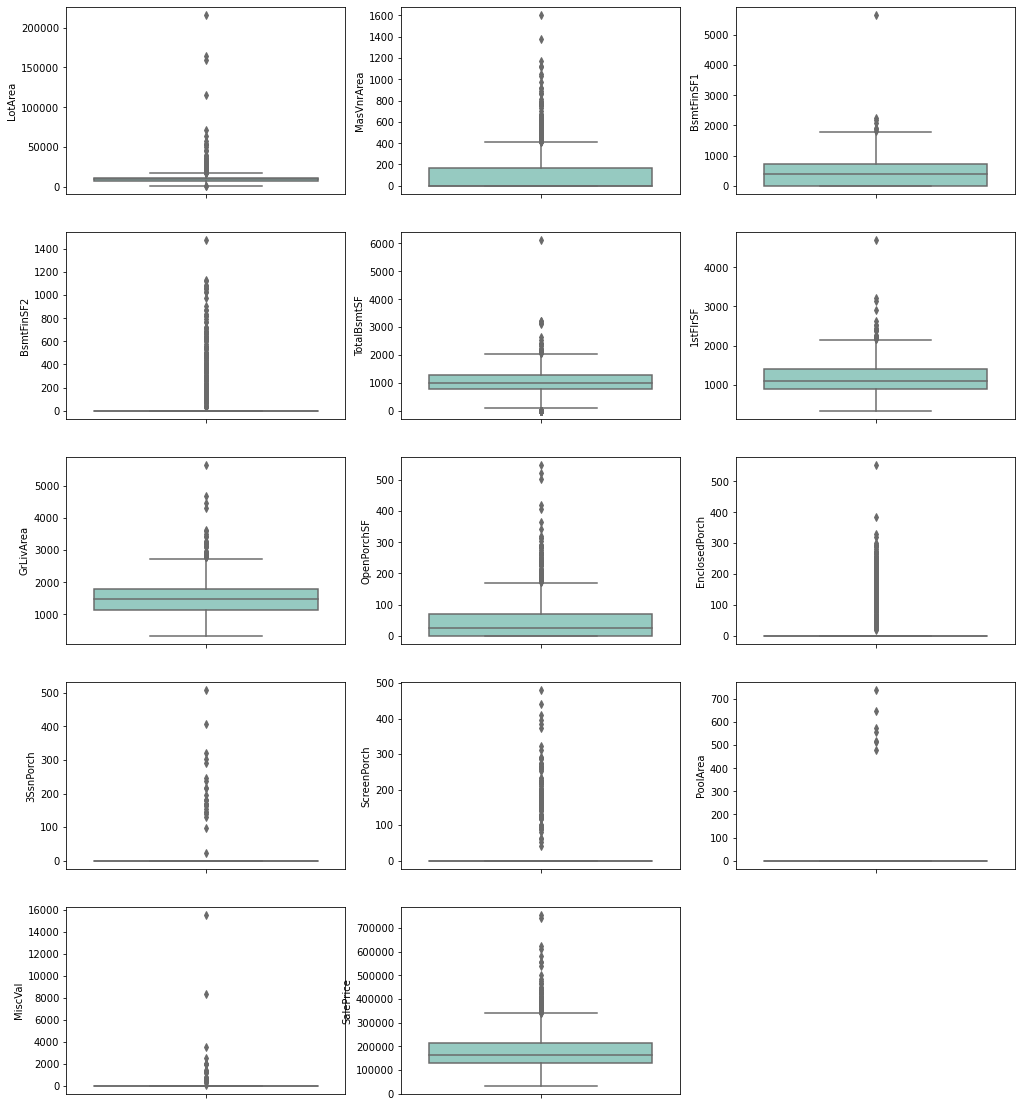

In [435]:
# Check the outliers for all the numercial columns

plt.figure(figsize=(17,20))
plt.subplot(5,3,1)
sns.boxplot(y='LotArea',palette = 'Set3',data = house_info)
plt.subplot(5,3,2)
sns.boxplot(y='MasVnrArea',palette = 'Set3',data = house_info)
plt.subplot(5,3,3)
sns.boxplot(y='BsmtFinSF1',palette = 'Set3',data = house_info)
plt.subplot(5,3,4)
sns.boxplot(y='BsmtFinSF2',palette = 'Set3',data = house_info)
plt.subplot(5,3,5)
sns.boxplot(y='TotalBsmtSF',palette = 'Set3',data = house_info)
plt.subplot(5,3,6)
sns.boxplot(y='1stFlrSF',palette = 'Set3',data = house_info)
plt.subplot(5,3,7)
sns.boxplot(y='GrLivArea',palette = 'Set3',data = house_info)
plt.subplot(5,3,8)
sns.boxplot(y='OpenPorchSF',palette = 'Set3',data = house_info)
plt.subplot(5,3,9)
sns.boxplot(y='EnclosedPorch',palette = 'Set3',data = house_info)
plt.subplot(5,3,10)
sns.boxplot(y='3SsnPorch',palette = 'Set3',data = house_info)
plt.subplot(5,3,11)
sns.boxplot(y='ScreenPorch',palette = 'Set3',data = house_info)
plt.subplot(5,3,12)
sns.boxplot(y='PoolArea',palette = 'Set3',data = house_info)
plt.subplot(5,3,13)
sns.boxplot(y='MiscVal',palette = 'Set3',data = house_info)
plt.subplot(5,3,14)
sns.boxplot(y='SalePrice',palette = 'Set3',data = house_info)


In [436]:
# Removing the outliers considering the lower and upper quarntile as 0.25 and 0.99
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x 

house_info = drop_outliers(house_info)

In [437]:
house_info.shape

(1441, 71)

### Exploratory Data Analysis


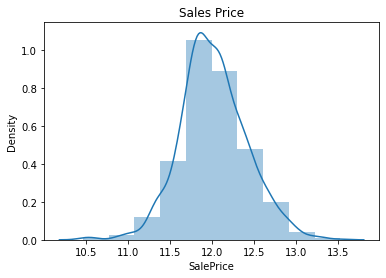

In [438]:
house_info['SalePrice'] = np.log1p(house_info['SalePrice'])
plt.title("Sales Price")
sns.distplot(house_info['SalePrice'],bins = 10)
plt.show()

Target Value seems to be normalised with some noise

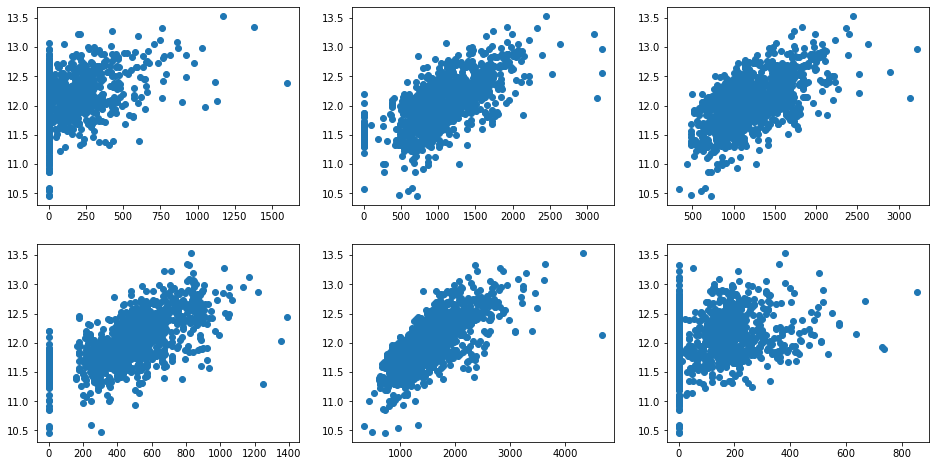

In [439]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_info.MasVnrArea,house_info.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_info.TotalBsmtSF,house_info.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_info['1stFlrSF'],house_info.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_info['GarageArea'],house_info.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_info['GrLivArea'],house_info.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_info['WoodDeckSF'],house_info.SalePrice)

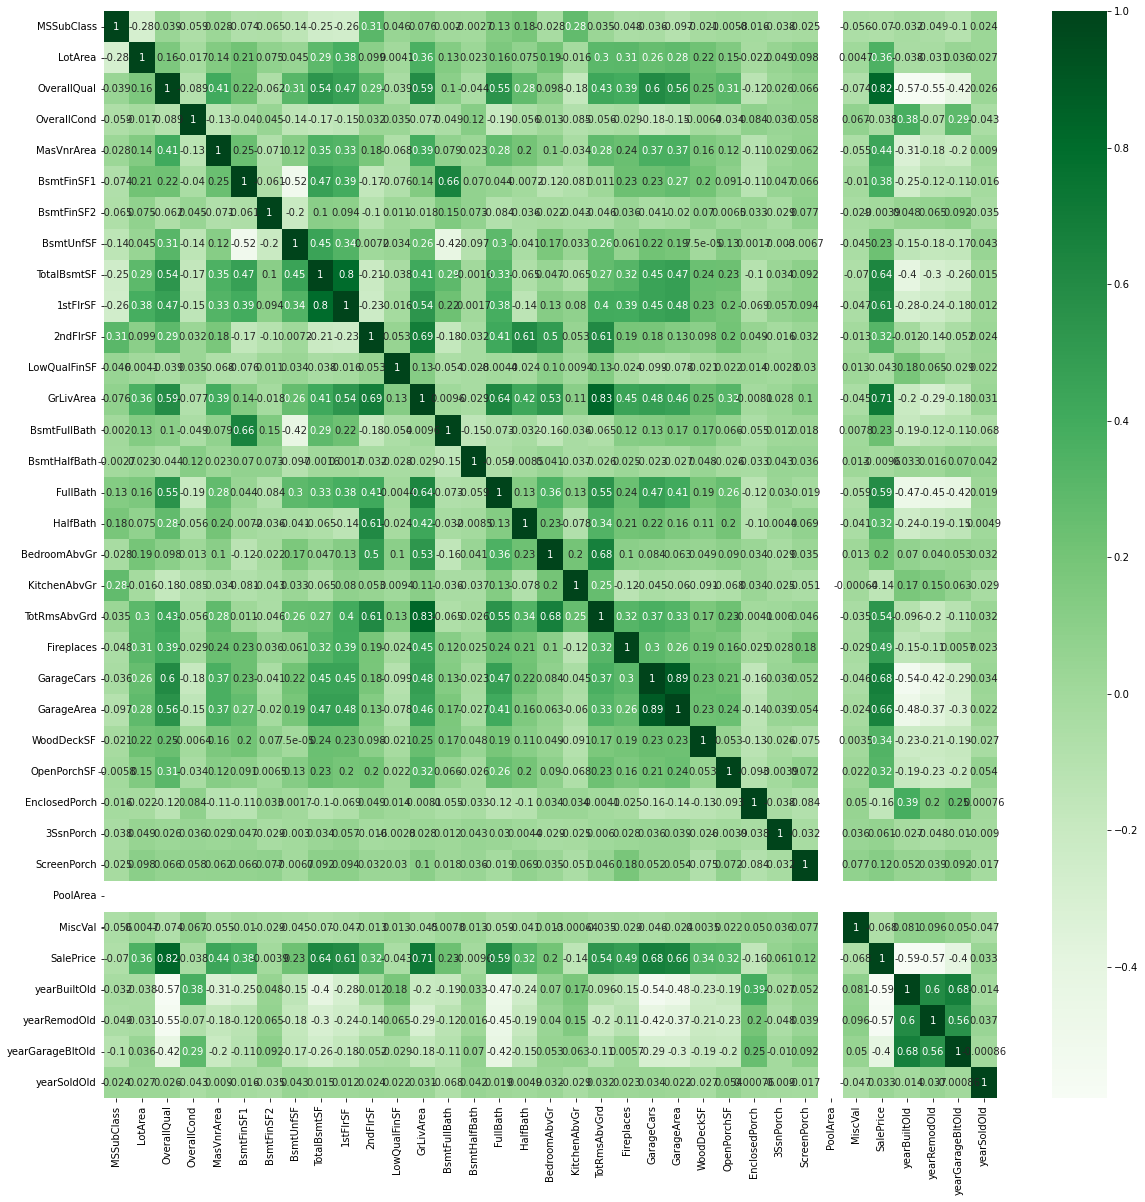

In [440]:
# checking correlation between variables using Heatmap Plot

plt.figure(figsize=(20,20))
sns.heatmap(house_info.corr(),annot = True,cmap = "Greens")
plt.show()

As per the above plot there is a high Correlation between below mentioned variables

- TotRmsAbvGrd and GrLivArea show 83%
- GarageArea and Garage Cars show 89%

In [441]:
# Hence dropping the high correlated variables
house_info.drop(['TotRmsAbvGrd','GarageArea'],axis = 1, inplace = True)

In [442]:
house_info.shape

(1441, 69)

### Data Preparation

In [443]:
house_info[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [444]:
# As the values of following fields are in ordered list, we shall assign values to them in sequence

house_info['LandSlope'] = house_info.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_info['ExterQual'] = house_info.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_info['BsmtQual'] = house_info.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_info['BsmtCond'] = house_info.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_info['BsmtExposure'] = house_info.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_info['BsmtFinType1'] = house_info.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_info['BsmtFinType2'] = house_info.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_info['HeatingQC'] = house_info.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_info['CentralAir'] = house_info.CentralAir.map({'N':0,'Y':1})
house_info['KitchenQual'] = house_info.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_info['GarageFinish'] = house_info.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_info['GarageQual'] = house_info.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_info['GarageCond'] = house_info.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_info['ExterCond'] = house_info.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_info['LotShape'] = house_info.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [445]:
house_info[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [446]:
house_info[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [447]:
# Create the dummy variables

dummy_col = pd.get_dummies(house_info[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

In [448]:
# Join the dummy variable to the dataset
house_info = pd.concat([house_info,dummy_col],axis='columns')

house_info.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,0,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,0,Lvl,Corner,0,Crawfor,Norm,Norm,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,0,Lvl,FR2,0,NoRidge,Norm,Norm,...,0,0,0,0,1,0,0,0,1,0


In [449]:
# Dropt the actual columns

house_info = house_info.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')


In [450]:
house_info.shape

(1441, 192)

### Train and Test Split Data

In [451]:
df_train,df_test = train_test_split(house_info,train_size=0.7,test_size=0.3,random_state=42)

In [452]:
house_info.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,0,8,5,350.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0


#### Scaling the Dataset

In [453]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [454]:
# Split into train and test data

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Recursive feature elimination (RFE)

Since there are around 192 features, we will use RFE to get the best 70 features out of the 111 features and use the new
features for further analysis

In [455]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe = rfe.fit(X_train,y_train)

In [456]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

In [457]:
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,BsmtFinSF1,True,1
3,BsmtFinSF2,True,1
4,BsmtUnfSF,True,1
...,...,...,...
65,SaleType_New,True,1
66,SaleType_Oth,True,1
67,SaleCondition_AdjLand,True,1
68,SaleCondition_Normal,True,1


In [458]:
X_train_rfe = X_train[col]

In [459]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]



In [460]:
X_train

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Functional_Maj2,Functional_Mod,Functional_Sev,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
1180,0.640158,-0.519192,1.782533,-0.300107,-1.270588,0.385108,1,0.377167,1.935062,-0.123821,...,0,0,0,0,0,0,0,0,1,0
445,-0.090623,-0.519192,-1.016705,-0.300107,1.982008,0.914924,1,1.442155,-0.819235,-0.123821,...,0,0,0,0,0,0,0,0,1,0
986,-0.090623,2.164632,-1.016705,-0.300107,-0.172044,-1.375325,1,-0.431788,0.616805,-0.123821,...,0,0,0,0,0,0,0,0,1,0
416,-0.090623,1.270024,-0.535586,-0.300107,-0.221875,-0.924982,1,-1.327903,0.829720,-0.123821,...,0,0,0,0,0,0,0,0,1,0
767,-0.090623,1.270024,0.502618,-0.300107,-0.538980,-0.176015,1,-0.480816,0.918056,-0.123821,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,0.640158,-0.519192,-1.016705,-0.300107,0.695466,-0.452964,1,-0.742296,1.749329,-0.123821,...,0,0,0,0,0,1,0,0,0,1
1142,1.370938,-0.519192,1.630601,-0.300107,-0.554836,0.987171,1,0.834758,2.265759,-0.123821,...,0,0,0,0,0,1,0,0,0,1
1310,0.640158,2.164632,2.219914,-0.300107,-0.147129,2.037170,1,2.022315,-0.819235,-0.123821,...,0,0,0,0,0,0,0,0,1,0
871,-0.090623,-0.519192,0.145807,-0.300107,-0.593341,-0.607092,1,-0.968368,1.169477,-0.123821,...,0,0,0,0,0,0,0,0,1,0


In [461]:
X_test

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Functional_Maj2,Functional_Mod,Functional_Sev,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
168,0.640158,-0.519192,-1.016705,-0.300107,0.632045,-0.520395,1,-0.870312,1.174007,-0.123821,...,0,0,0,0,0,0,0,0,1,0
1013,-0.821403,-1.413800,-0.448110,2.309699,-0.568426,-0.082093,0,-0.374589,-0.819235,-0.123821,...,1,0,0,0,0,0,0,0,1,0
557,-1.552183,0.375416,0.449672,-0.300107,-1.270588,-1.009271,1,-0.715058,0.175121,-0.123821,...,0,0,0,0,0,0,0,0,1,0
65,1.370938,-0.519192,-1.016705,-0.300107,1.318352,0.209305,1,-0.045015,2.193278,-0.123821,...,0,0,0,0,0,0,0,0,1,0
637,-0.821403,-1.413800,-1.016705,-0.300107,0.566359,-0.590235,1,-0.949301,0.485432,-0.123821,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2.832499,-0.519192,1.681245,-0.300107,-0.074647,1.550702,1,1.521144,-0.819235,-0.123821,...,0,0,0,0,0,0,0,0,1,0
1205,0.640158,1.270024,0.099767,0.693303,2.117911,2.653682,1,2.823098,-0.819235,-0.123821,...,0,0,0,0,0,0,0,0,1,0
444,0.640158,-0.519192,0.461182,-0.300107,-0.652232,-0.339776,1,-0.617003,1.389186,-0.123821,...,0,0,0,0,0,0,0,0,1,0
934,0.640158,1.270024,-0.038353,-0.300107,-0.908182,-1.134500,1,2.477182,-0.819235,-0.123821,...,0,0,0,0,0,0,0,0,1,0


### Model Building and Evaluation

#### Lasso Model

In [462]:
# Lets Begin with Lasso Regression Model

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9138257017912714
0.8916893055741526


In [463]:
# Lets improve the optimal value of alpha using GridSearchCV

folds = KFold(n_splits=10,shuffle=True,random_state=42)

params = {'alpha': [0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [464]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007352,0.005679,0.002600,0.001020,0.001,{'alpha': 0.001},0.846947,0.918667,0.785718,0.899758,...,0.931782,0.926596,0.926724,0.922850,0.923151,0.930751,0.925544,0.925506,0.926482,0.002931
1,0.004134,0.005935,0.003064,0.005689,0.010,{'alpha': 0.01},0.847538,0.918754,0.788567,0.899848,...,0.931778,0.926595,0.926722,0.922848,0.923149,0.930749,0.925542,0.925504,0.926480,0.002931
2,0.004970,0.006827,0.004126,0.005868,0.100,{'alpha': 0.1},0.851572,0.919528,0.811985,0.900633,...,0.931492,0.926476,0.926554,0.922695,0.923005,0.930651,0.925404,0.925390,0.926334,0.002910
3,0.006291,0.007706,0.003126,0.006252,0.200,{'alpha': 0.2},0.853845,0.920207,0.830526,0.901309,...,0.930869,0.926192,0.926172,0.922359,0.922665,0.930429,0.925098,0.925116,0.926001,0.002871
4,0.007108,0.007229,0.003826,0.006254,0.500,{'alpha': 0.5},0.856093,0.921441,0.862918,0.902572,...,0.928473,0.924945,0.924630,0.921058,0.921200,0.929526,0.923863,0.923918,0.924629,0.002779


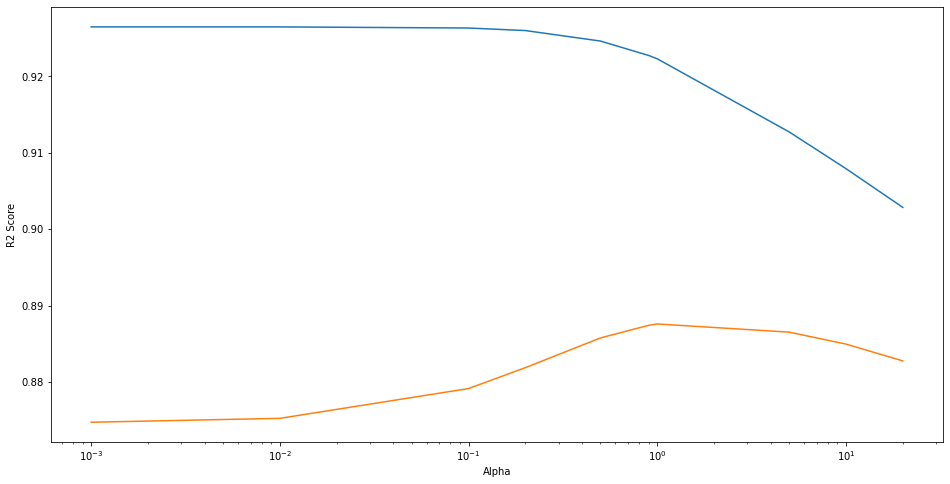

In [465]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [466]:
# Check the best parameter alpha value of Lasso

lasso_model_cv.best_params_

{'alpha': 0.001}

In [467]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9138257017912714
0.8916893055741526


In [468]:
lasso_df = pd.DataFrame({'Features':X_train.columns,'Coefficient': lasso.coef_.round(2)})
lasso_df.reset_index(drop=True,inplace = True)
laso_df1 = lasso_df.sort_values(by='Coefficient',ascending=False).head(10)
laso_df1

,Features,Coefficient
42,RoofMatl_WdShngl,0.39
14,MSZoning_RL,0.38
12,MSZoning_FV,0.35
65,SaleType_New,0.33
10,GrLivArea,0.33
6,CentralAir,0.27
0,OverallQual,0.27
23,Neighborhood_NridgHt,0.26
63,SaleType_ConLD,0.21
53,Foundation_PConc,0.20


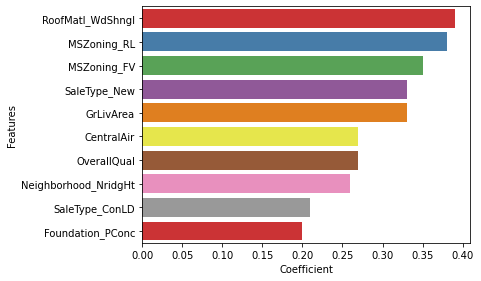

In [469]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = laso_df1)
plt.show()

In [470]:
# Calculate mean squared value of Lasso
round(mean_squared_error(y_test, lasso.predict(X_test)),4)

0.111

#### Ridge Regression Model

In [471]:
# Lets Begin with Ridge Regression Model

ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9248578347346362
0.8825639962958994


In [472]:
# Lets improve the optimal value of alpha using GridSearchCV

folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [473]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010488,0.012016,0.002999,0.003066,0.001,{'alpha': 0.001},0.846947,0.918667,0.785718,0.899758,...,0.931782,0.926596,0.926724,0.922850,0.923151,0.930751,0.925544,0.925506,0.926482,0.002931
1,0.005097,0.002387,0.003563,0.004139,0.010,{'alpha': 0.01},0.847538,0.918754,0.788567,0.899848,...,0.931778,0.926595,0.926722,0.922848,0.923149,0.930749,0.925542,0.925504,0.926480,0.002931
2,0.004008,0.002404,0.001599,0.001356,0.100,{'alpha': 0.1},0.851572,0.919528,0.811985,0.900633,...,0.931492,0.926476,0.926554,0.922695,0.923005,0.930651,0.925404,0.925390,0.926334,0.002910
3,0.005606,0.001268,0.002700,0.001100,0.200,{'alpha': 0.2},0.853845,0.920207,0.830526,0.901309,...,0.930869,0.926192,0.926172,0.922359,0.922665,0.930429,0.925098,0.925116,0.926001,0.002871
4,0.005385,0.004905,0.003150,0.003181,0.500,{'alpha': 0.5},0.856093,0.921441,0.862918,0.902572,...,0.928473,0.924945,0.924630,0.921058,0.921200,0.929526,0.923863,0.923918,0.924629,0.002779


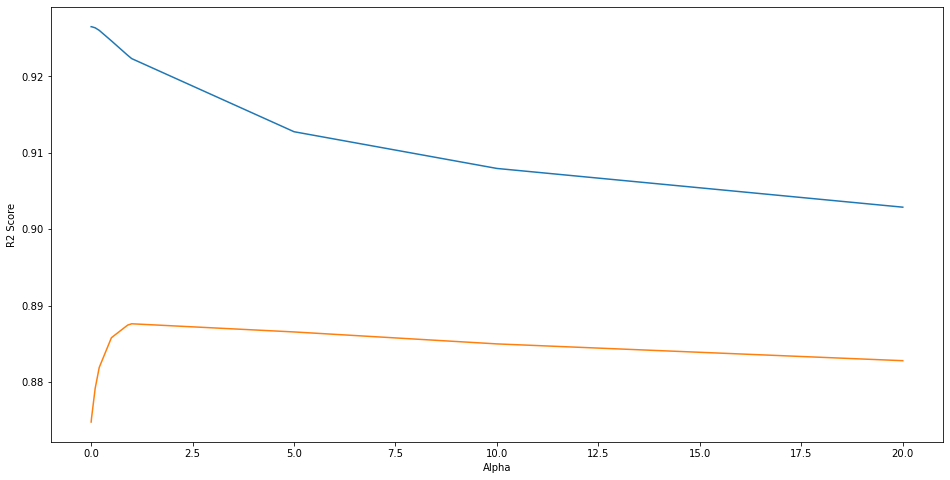

In [474]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [475]:
# Check the best parameter alpha value of Ridge
model_cv.best_params_

{'alpha': 1.0}

In [476]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9213634824235336
0.8878705661340682


In [477]:
ridge_df = pd.DataFrame({'Features':X_train.columns,'Coefficient': ridge.coef_.round(2)})
ridge_df.reset_index(drop=True,inplace = True)
ridge_df1 = ridge_df.sort_values(by='Coefficient',ascending=False).head(10)
ridge_df1

,Features,Coefficient
14,MSZoning_RL,0.71
12,MSZoning_FV,0.65
42,RoofMatl_WdShngl,0.57
13,MSZoning_RH,0.54
15,MSZoning_RM,0.43
29,Condition2_Feedr,0.41
65,SaleType_New,0.36
30,Condition2_Norm,0.35
63,SaleType_ConLD,0.34
32,Condition2_RRNn,0.34


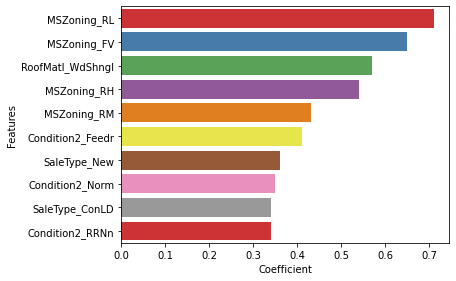

In [478]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_df1)
plt.show()

In [479]:
# Calculate mean squared value of Ridge
round(mean_squared_error(y_test, ridge.predict(X_test)),4)

0.1149

#### The optimal value of Ridge and Lasso is as below:

- Ridge: 1.0
- Lasso: 0.001

#### The mean squared value of Ridge and Lasso is as below

- Ridge: 0.1149
- Lasso: 0.1110


- The Mean Squared Error of Lasso is slightly lower than that of Ridge
- Lasso has a better edge over ridge as it helps in feature reduction
- The variables predicted by Lasso are significant variables for predicting the price of a house

##### I'll be considering the Lasso Model as Final Model

### Final Model

In [480]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9138257017912714
0.8916893055741526


### Assignment - 2 Q3. Pseudo code

In [481]:
X_train1 = X_train.drop(['RoofMatl_WdShngl','MSZoning_RL','MSZoning_FV','SaleType_New','GrLivArea'],axis=1)
X_test1 = X_test.drop(['RoofMatl_WdShngl','MSZoning_RL','MSZoning_FV','SaleType_New','GrLivArea'],axis=1)

# Build the Lasso Model based on new dataset
lasso = Lasso(alpha=0.001)
lasso.fit(X_train1,y_train)

y_train_pred = lasso.predict(X_train1)
y_test_pred = lasso.predict(X_test1)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))




0.9084221249064214
0.8900916839038614


In [482]:
lasso_df = pd.DataFrame({'Features':X_train1.columns,'Coefficient': lasso.coef_.round(2)})
lasso_df.reset_index(drop=True,inplace = True)
laso_df1 = lasso_df.sort_values(by='Coefficient',ascending=False).head(10)

laso_df1

,Features,Coefficient
64,SaleCondition_Partial,0.34
6,CentralAir,0.30
8,2ndFlrSF,0.29
0,OverallQual,0.28
20,Neighborhood_NridgHt,0.25
7,1stFlrSF,0.23
63,SaleCondition_Normal,0.21
49,Foundation_PConc,0.20
40,Exterior1st_BrkFace,0.19
15,Neighborhood_Crawfor,0.18


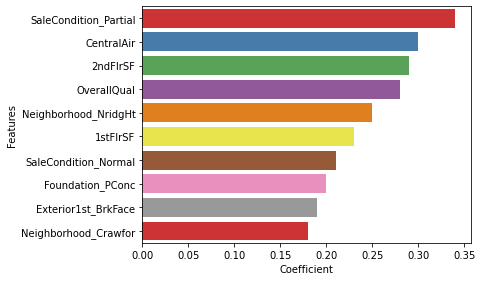

In [483]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = laso_df1)
plt.show()